<a href="https://colab.research.google.com/github/Narmadhakannan/foundation-of-machine-learning/blob/main/ex_no_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

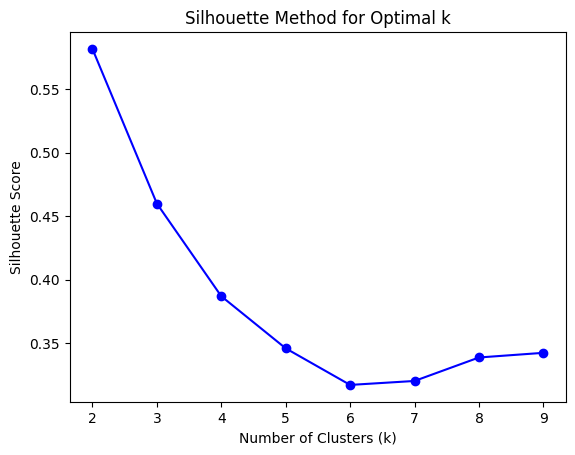

Best number of clusters (k): 2

Cluster Labels: [0 1]
Cluster Sizes: {np.int32(0): np.int64(100), np.int32(1): np.int64(50)}

Cluster Centers (standardized features):
 [[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]

Cluster Mapping to True Species:

True Label   0   1   2
Cluster               
0            0  50  50
1           50   0   0


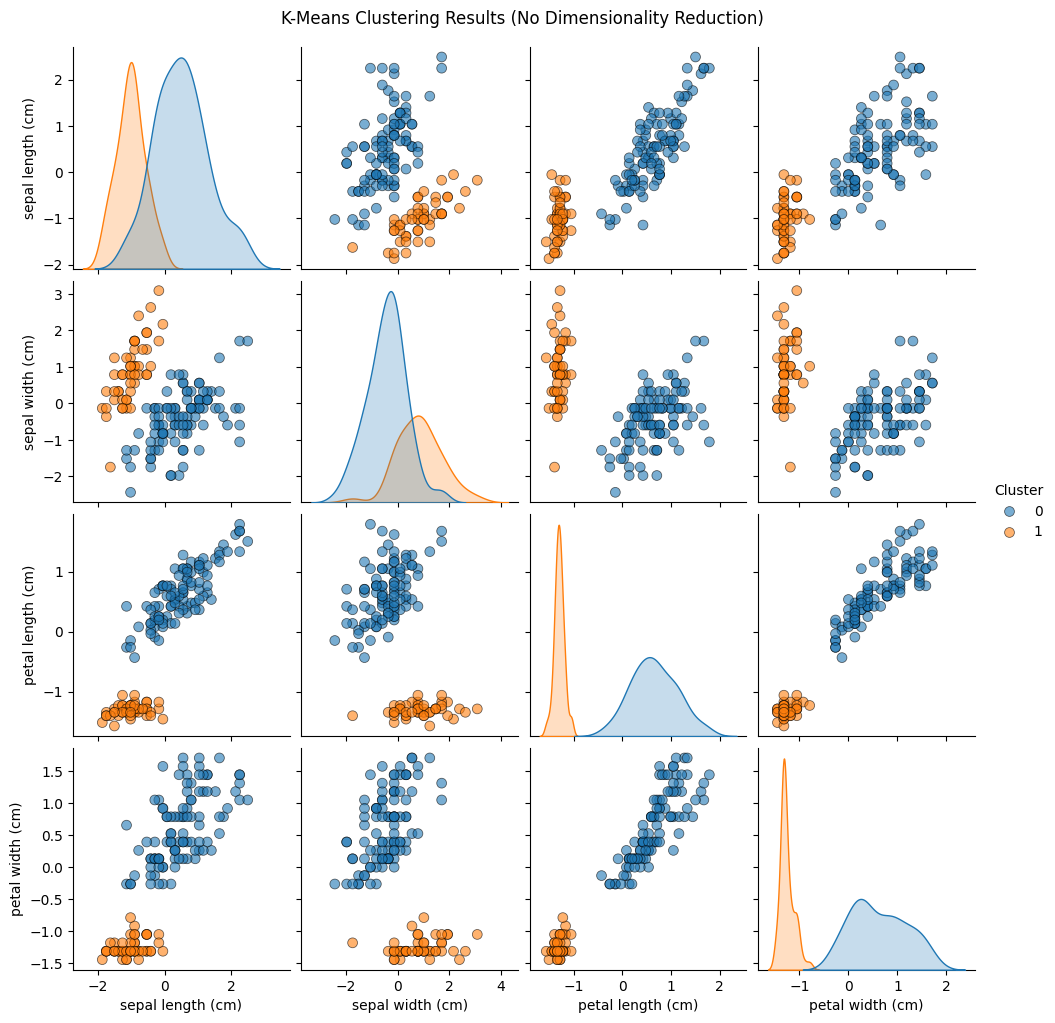


Cluster Size Analysis:
Cluster 0: 100 samples
Cluster 1: 50 samples


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bo-')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = K[np.argmax(silhouette_scores)]
print("Best number of clusters (k):", best_k)

final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

labels = final_kmeans.labels_
centers = final_kmeans.cluster_centers_
unique, counts = np.unique(labels, return_counts=True)

print("\nCluster Labels:", np.unique(labels))
print("Cluster Sizes:", dict(zip(unique, counts)))
print("\nCluster Centers (standardized features):\n", centers)

comparison = pd.DataFrame({'True Label': y_true, 'Cluster': labels})
print("\nCluster Mapping to True Species:\n")
print(pd.crosstab(comparison['Cluster'], comparison['True Label']))

df_clusters = pd.DataFrame(X_scaled, columns=feature_names)
df_clusters['Cluster'] = labels

sns.pairplot(df_clusters, diag_kind='kde', hue='Cluster',
             plot_kws={'s': 50, 'alpha': 0.6, 'edgecolor': 'k'})

plt.suptitle("K-Means Clustering Results (No Dimensionality Reduction)", y=1.02)
plt.show()

print("\nCluster Size Analysis:")
for i in unique:
    print(f"Cluster {i}: {counts[i]} samples")
